# importing the neccessary libraries

In [153]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten 
from tensorflow.keras.applications import Xception 
from tensorflow.keras.optimizers import Adamax 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
import tensorflow
import os 
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split 

# declaring the dataset path

In [123]:
tr_path = r"/kaggle/input/brain-tumor-mri-dataset/Training"
ts_path = r"/kaggle/input/brain-tumor-mri-dataset/Testing"

# function to create dataframe with images paths

In [124]:
def flow(path):
    data = []
    for labels in os.listdir(path):
        folder_path = os.path.join(path, labels)
        if os.path.isdir(folder_path):
            for files in os.listdir(folder_path):
                file_path = os.path.join(folder_path,files)
                data.append((file_path,labels))
    return pd.DataFrame(data,columns=["filepath","labels"])



In [125]:
tr_df = flow(tr_path)
ts_df = flow(ts_path)

In [126]:
ts_df , val_df = train_test_split(ts_df , train_size=0.8 , random_state=42 )

# converting the datset into a tesnorflow dataset

In [127]:
gen = ImageDataGenerator(
    rescale = 1./255
)

In [128]:
train = gen.flow_from_dataframe(tr_df,x_col="filepath",y_col="labels",batch_size=32,target_size=(299,299))
test = gen.flow_from_dataframe(ts_df,x_col="filepath",y_col="labels",batch_size=32,target_size=(299,299))
val = gen.flow_from_dataframe(val_df,x_col="filepath",y_col="labels",batch_size=32,target_size=(299,299))


Found 5712 validated image filenames belonging to 4 classes.
Found 1048 validated image filenames belonging to 4 classes.
Found 263 validated image filenames belonging to 4 classes.


# creating the model 

In [129]:
base_model = Xception(include_top=False , input_shape=(299,299,3), weights='imagenet',pooling = "max")

In [130]:
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4,activation="softmax")

])

model.compile(Adamax(learning_rate = 0.001),
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [131]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

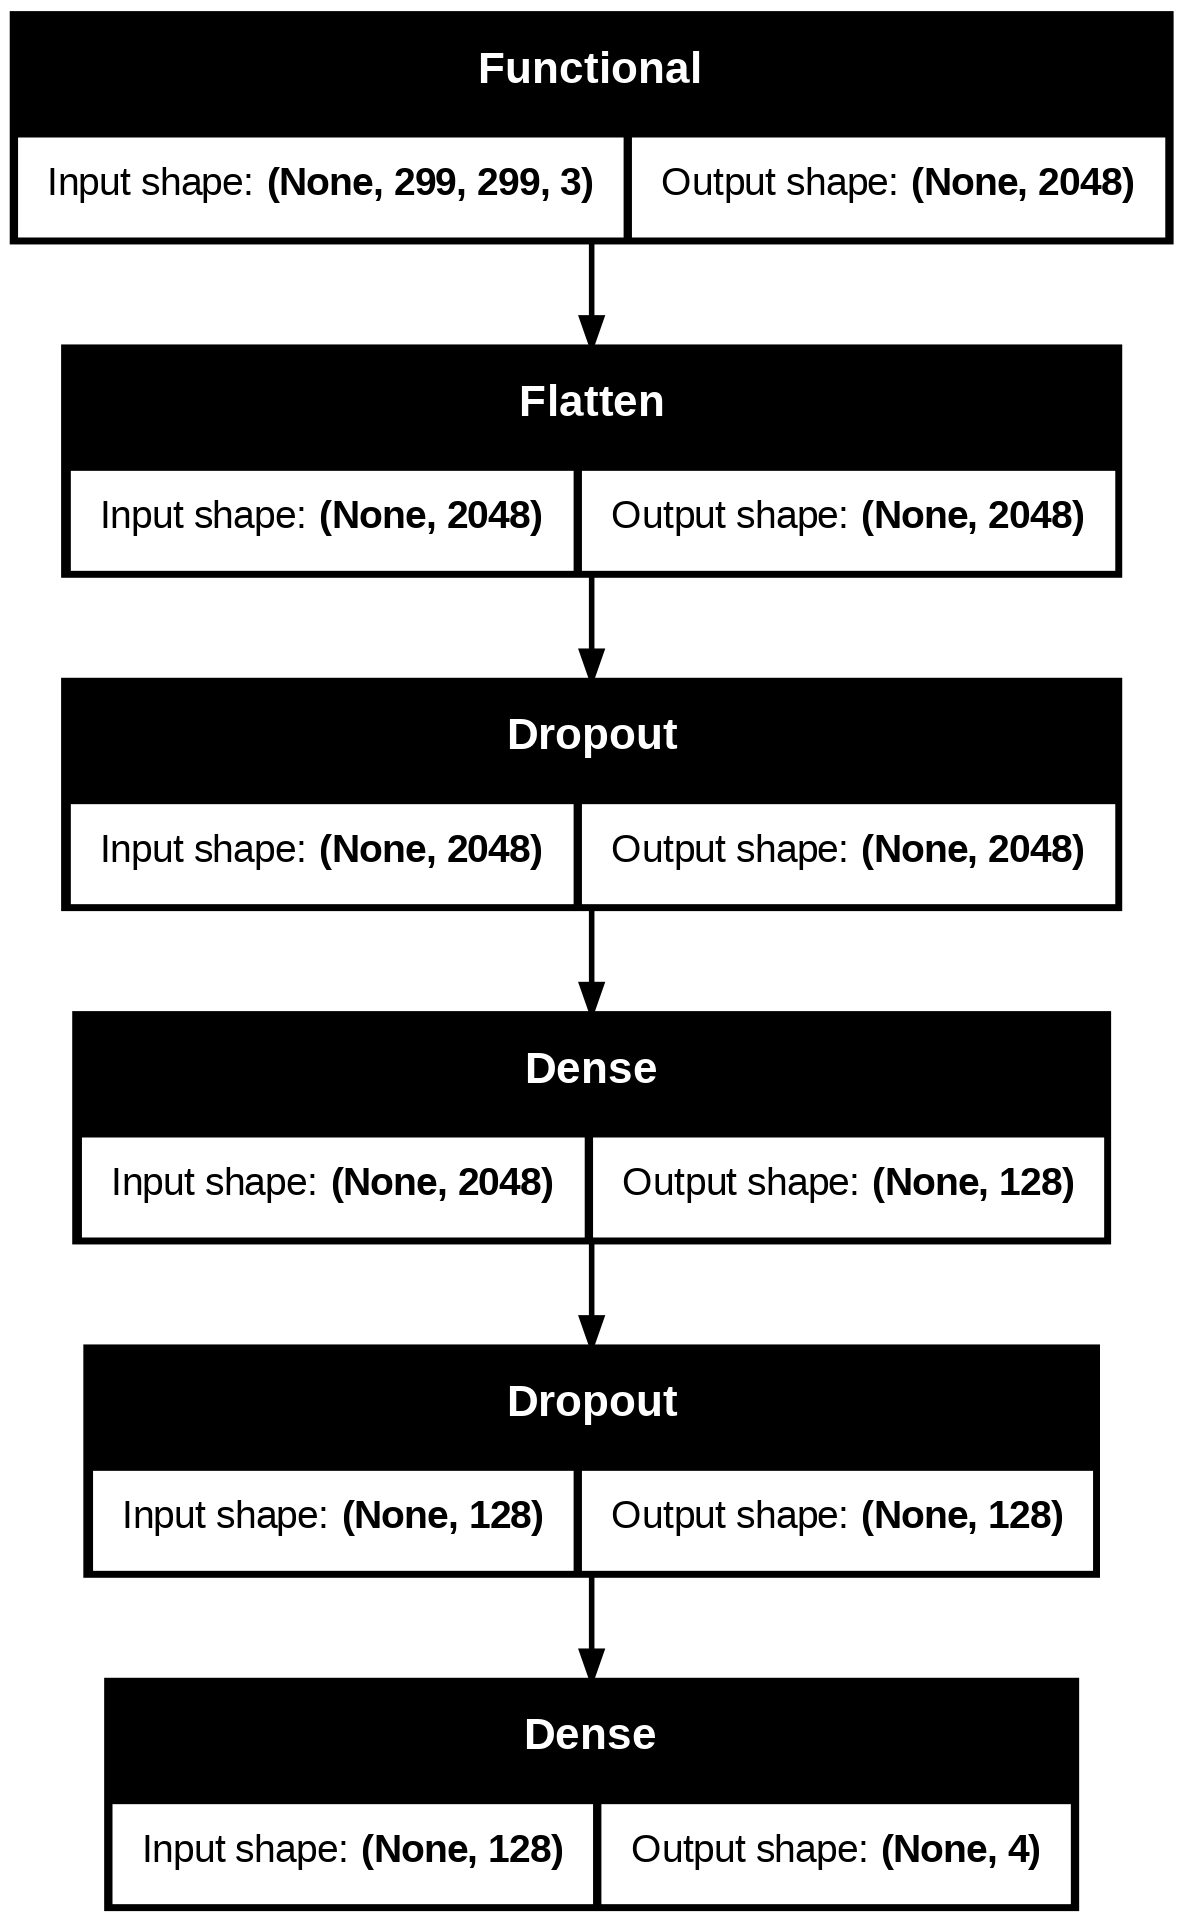

In [132]:
plot_model(model , show_shapes= True)

# training the model 

In [133]:
hsit = model.fit(train , validation_data= val , shuffle = False , verbose= 1 , epochs = 9)

Epoch 1/9
179/179 ━━━━━━━━━━━━━━━━━━━━ 131s 540ms/step - accuracy: 0.7918 - loss: 0.6139 - val_accuracy: 0.8441 - val_loss: 0.4934
Epoch 2/9
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 439ms/step - accuracy: 0.9777 - loss: 0.0695 - val_accuracy: 0.9544 - val_loss: 0.1519
Epoch 3/9
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 438ms/step - accuracy: 0.9910 - loss: 0.0230 - val_accuracy: 0.9620 - val_loss: 0.1551
Epoch 4/9
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 439ms/step - accuracy: 0.9947 - loss: 0.0281 - val_accuracy: 0.9886 - val_loss: 0.0451
Epoch 5/9
179/179 ━━━━━━━━━━━━━━━━━━━━ 78s 437ms/step - accuracy: 0.9976 - loss: 0.0101 - val_accuracy: 0.9848 - val_loss: 0.0577
Epoch 6/9
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 439ms/step - accuracy: 0.9981 - loss: 0.0075 - val_accuracy: 0.9658 - val_loss: 0.1346
Epoch 7/9
179/179 ━━━━━━━━━━━━━━━━━━━━ 78s 438ms/step - accuracy: 0.9950 - loss: 0.0194 - val_accuracy: 0.9810 - val_loss: 0.1259
Epoch 8/9
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 439ms/step - accuracy: 0.9979 - loss: 0.0089 -

In [134]:
hsit.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [135]:
accuracy = hsit.history['accuracy']
val_accuracy = hsit.history["val_accuracy"]


loss = hsit.history['loss']
val_loss = hsit.history['val_loss']

In [136]:
model.evaluate(test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - accuracy: 0.9903 - loss: 0.0264


[0.020183727145195007, 0.9933205842971802]

In [137]:
plt.figure(figsize = (15,20))


<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

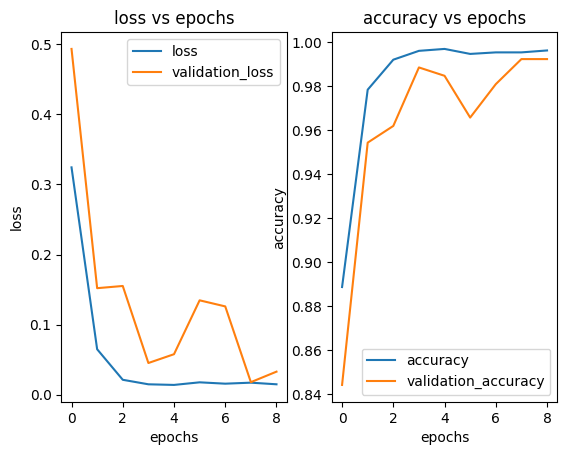

In [138]:
plt.subplot(1,2,1)
plt.plot(loss , label= "loss")
plt.plot(val_loss , label = "validation_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss vs epochs")
plt.legend()


plt.subplot(1,2,2)
plt.plot(accuracy , label= "accuracy")
plt.plot(val_accuracy , label = "validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy vs epochs")
plt.legend()

In [169]:
model.save("tumormodel.h5")

In [170]:
model.save("model_tumor.h5")

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}